In [3]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sb
import pandas as pd

In [4]:
df = pd.read_csv('advertising.csv')

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

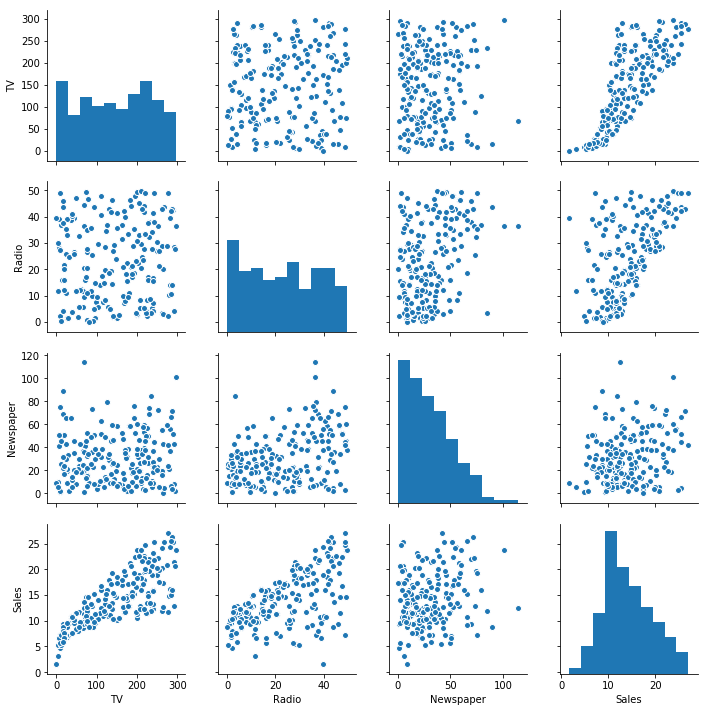

In [7]:
sb.pairplot(df)

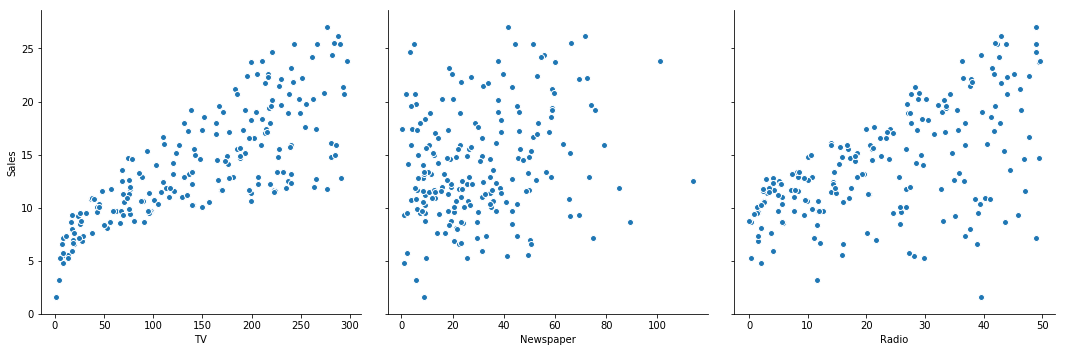

In [8]:
sb.pairplot(df, x_vars = ['TV', 'Newspaper', 'Radio'], y_vars = ['Sales'], size = 5)

In [9]:
x = df[['TV','Newspaper','Radio']]
y = df['Sales']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7 )

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
from sklearn.linear_model import LinearRegression as lr

In [13]:
model = lr()

In [14]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print(model.coef_)

pd.DataFrame(model.coef_, index = x.columns, columns = ['coefficients'])

[ 0.0453695  -0.0058218   0.18573596]


,coefficients
TV,0.045369
Newspaper,-0.005822
Radio,0.185736


In [16]:
model.intercept_

3.1377461994156146

In [17]:
y_pred = model.predict(x_test)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
# lets calculate the suquared error and the r square error
sqr_error = mean_squared_error(y_test, y_pred)
r_squared_error = r2_score(y_test, y_pred)

In [20]:
print(sqr_error)
print(r_squared_error)
# this is a fantastic model as the r2 score value is so near to 1

2.285257696895683
0.9162255558511779


# Now we'll see how to do linear regression using a different model called OLS model

In [21]:
# checking for P- value using STATSMODELs
import statsmodels.api as sm
x_train_sm = x_train
# the step performed below does convert the intercept value to the constant as is required by this model
x_train_sm = sm.add_constant(x_train_sm)

In [22]:
# now les make a new model for this data
new_model = sm.OLS(y_train, x_train_sm).fit()

In [23]:
# to see the constants in this model we need to use the attribute param
new_model.params

const        3.137746
TV           0.045369
Newspaper   -0.005822
Radio        0.185736
dtype: float64

In [26]:
# now to infer something from the data we need to use the summary function
print(new_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     353.5
Date:                Wed, 20 Feb 2019   Prob (F-statistic):           5.36e-64
Time:                        06:34:35   Log-Likelihood:                -276.24
No. Observations:                 140   AIC:                             560.5
Df Residuals:                     136   BIC:                             572.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1377      0.394      7.970      0.0

In [27]:
# here from this information we mainly focus upon p-value
# if p-value is higheer than 0.05 than we fail to reject null hypothesis and we take the column to be insignificant

In [28]:
# even from the correlation values we can see that the newspaper is least related to the sales
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


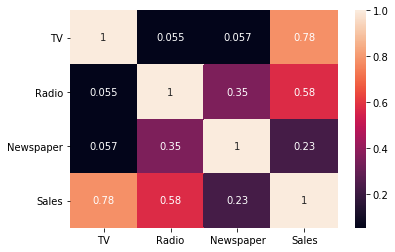

In [32]:
# lets plot a heatmap for this data, and enabling the annotation in heatmap
sb.heatmap(df.corr(), annot = True)

In [33]:
# since newpaper was least related lets now create a model without considering newspaper

In [35]:
x_train_new = x_train[['TV','Radio']]
x_test_new = x_test[['TV','Radio']]

In [36]:
model.fit(x_train_new, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
y_pred_new = model.predict(x_test_new)

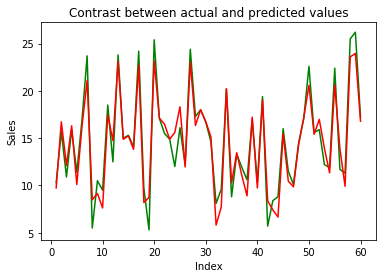

In [41]:
# lets create a index column , we'll get that as
indices = [i for i in range(1, len(x_test) +1)]

# lets now create a graph , comparing the actual and predicted values
fig = plt.figure()
plt.plot(indices, y_test, color = 'green')
plt.plot(indices, y_pred_new, color ='red')
plt.title('Contrast between actual and predicted values')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.show()

Text(0,0.5,'Error b/w actual and predicted sales values')

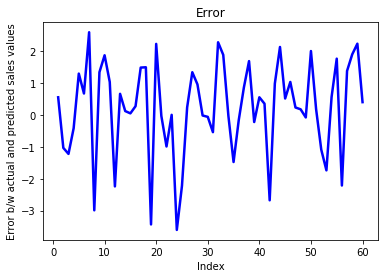

In [46]:
# lets now plot an error graph
error  = y_test - y_pred_new

plt.plot(indices , error, color = 'blue', linewidth = '2.5')
plt.title("Error")
plt.xlabel('Index')
plt.ylabel('Error b/w actual and predicted sales values')

In [53]:
# lets now calculate the mean squared and the r squared values 
r2_error = r2_score(y_test, y_pred_new)
squared_mean_error = mean_squared_error(y_test, y_pred_new)

In [54]:
print(r2_error,'  ', squared_mean_error)

0.9188551715409747    2.213525206682911


In [57]:
# Lets now try to get the summary of the model using the OLS module
x_train_sm = sm.add_constant(x_train_new)

# lets create a model now
model_final = sm.OLS(y_train, x_train_sm).fit()

# lets print summary
print(model_final.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     531.2
Date:                Wed, 20 Feb 2019   Prob (F-statistic):           2.86e-65
Time:                        07:34:48   Log-Likelihood:                -276.58
No. Observations:                 140   AIC:                             559.2
Df Residuals:                     137   BIC:                             568.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0149      0.363      8.301      0.0

In [59]:
# so the equation of our model will finally be (taking the values from above)
# y = 3.0149 + TV * 0.0455 + Radio * 0.1830

In [ ]:
# we can now separately create a model with newspaer and sales alone too but the error in that case will be significant.